# Imports

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Experiment Data

In [28]:
## Experiment 1
exp1_data = {
    'cores': [120, 240, 480, 960, 
              120, 240, 480, 960, 
              120, 240, 480, 960],
    'threads': [12, 12, 12, 12,
            24, 24, 24, 24,
            48, 48, 48, 48],
    'time': [283.35, 143.11, 74.22, 39.51,
            143.21, 74.25, 39.50, 22.55,
            74.33, 40.05, 22.66, 13.89]
}
exp1_df = pd.DataFrame(exp1_data)

exp1_linear_data = {
    'cores': [120, 240, 480, 960, 
              120, 240, 480, 960, 
              120, 240, 480, 960],
    'threads': ['Linear 12', 'Linear 12', 'Linear 12', 'Linear 12', 
                'Linear 24', 'Linear 24', 'Linear 24', 'Linear 24', 
                'Linear 48', 'Linear 48', 'Linear 48', 'Linear 48'],
    'time': [283.35, 141.68, 70.84, 35.42,
            143.21, 71.60, 35.80, 17.90,
            74.33, 37.16, 18.58, 9.29]
}
exp1_linear_df = pd.DataFrame(exp1_linear_data)



## Experiment 2

exp2_data = {
    'cores': [240, 480, 936],
    'tasks': [6.0, 12.0, 23.4],
    'linear_time': [29.16, 29.16, 29.16],
    'time': [29.16, 32.73, 39.64]
}

exp2_df = pd.DataFrame(exp2_data)


## Experiment 3

exp3_data = {
    'tasks': [4.682, 4.682, 
              12.170, 12.170, 
              23.402, 23.402],
    'task_duration': ['5s', '60s'] * 3,
    'linear_task_duration': ['5s linear', '60s linear'] * 3,
    'time': [3.12, 7.78,
             8.33, 20.47,
             16.58, 39.64],
    'linear_time': [3.12, 7.78,
                    8.11, 20.23,
                    15.59, 38.91]
}
exp3_df = pd.DataFrame(exp3_data)


## Experiment 4

exp4_data = {
    'task_duration': [5, 30, 60, 120] * 2,
    'tasks': ['4k tasks'] * 4 + ['23k tasks'] * 4,
    'linear_tasks': ['linear 4k tasks'] * 4 + ['linear 23k tasks'] * 4,
    'time': [3.12, 5.22, 7.78, 13.75,
             16.58, 27.00, 39.64, 63.21],
    'linear_time': [0.57, 3.44, 6.88, 13.75,
                    2.63, 15.80, 31.60, 63.21]
}
exp4_df = pd.DataFrame(exp4_data)

print("Exp1")
display(exp1_df)
print("Exp1 Linear")
display(exp1_linear_df)
print("Exp2")
display(exp2_df)
print("Exp3")
display(exp3_df)
print("Exp4")
display(exp4_df)

Exp1


,cores,threads,time
0,120,12,283.35
1,240,12,143.11
2,480,12,74.22
3,960,12,39.51
4,120,24,143.21
5,240,24,74.25
6,480,24,39.50
7,960,24,22.55
8,120,48,74.33
9,240,48,40.05


Exp1 Linear


,cores,threads,time
0,120,Linear 12,283.35
1,240,Linear 12,141.68
2,480,Linear 12,70.84
3,960,Linear 12,35.42
4,120,Linear 24,143.21
5,240,Linear 24,71.60
6,480,Linear 24,35.80
7,960,Linear 24,17.90
8,120,Linear 48,74.33
9,240,Linear 48,37.16


Exp2


,cores,tasks,linear_time,time
0,240,6.0,29.16,29.16
1,480,12.0,29.16,32.73
2,936,23.4,29.16,39.64


Exp3


,tasks,task_duration,linear_task_duration,time,linear_time
0,4.682,5s,5s linear,3.12,3.12
1,4.682,60s,60s linear,7.78,7.78
2,12.170,5s,5s linear,8.33,8.11
3,12.170,60s,60s linear,20.47,20.23
4,23.402,5s,5s linear,16.58,15.59
5,23.402,60s,60s linear,39.64,38.91


Exp4


,task_duration,tasks,linear_tasks,time,linear_time
0,5,4k tasks,linear 4k tasks,3.12,0.57
1,30,4k tasks,linear 4k tasks,5.22,3.44
2,60,4k tasks,linear 4k tasks,7.78,6.88
3,120,4k tasks,linear 4k tasks,13.75,13.75
4,5,23k tasks,linear 23k tasks,16.58,2.63
5,30,23k tasks,linear 23k tasks,27.00,15.80
6,60,23k tasks,linear 23k tasks,39.64,31.60
7,120,23k tasks,linear 23k tasks,63.21,63.21


# Plots

## Experiments 1 and 2

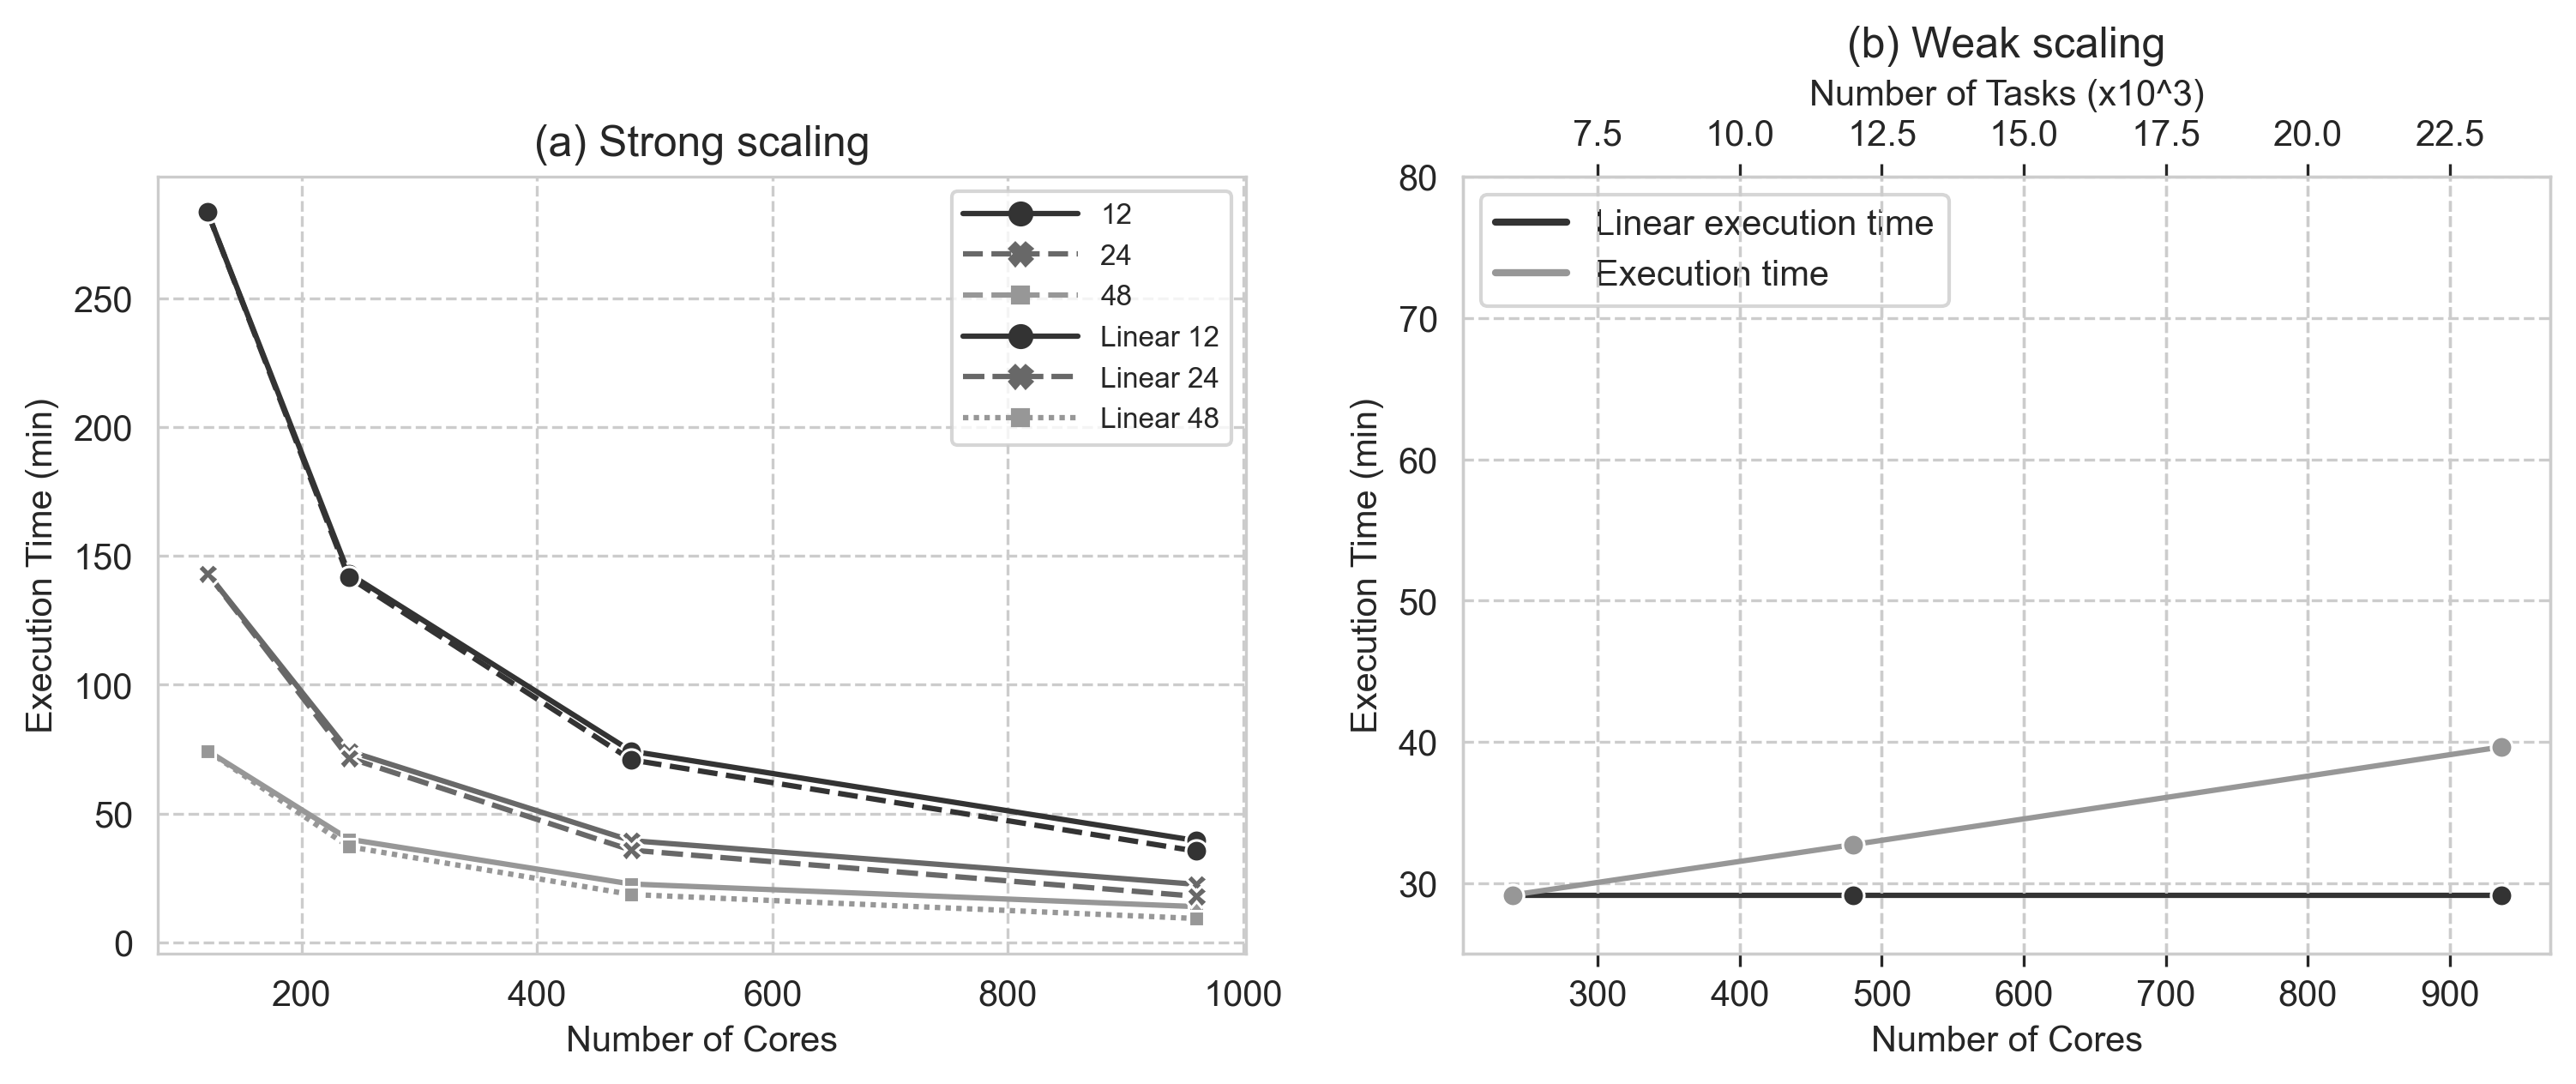

In [46]:
sns.set_style("whitegrid", {
    "ytick.major.size": 0.1,
    "ytick.minor.size": 0.05,
    'grid.linestyle': '--'
})

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=300)

palette = sns.color_palette("Greys_r", 5)[:3]

# Exp1 - Strong scaling
index = 0

axs[index].set_title("(a) Strong scaling")

sns.lineplot(data=exp1_df, x='cores', y='time', hue='threads', 
             style="threads", markers=True, dashes=False, 
             palette=palette, ax=axs[index])

temp_ax = sns.lineplot(data=exp1_linear_df, x='cores', y='time', hue='threads', 
             style="threads", dashes=True, markers=True, 
             palette=palette, ax=axs[index])

axs[index].lines[4].set_linestyle("--")
axs[index].lines[5].set_linestyle("--")
axs[index].lines[6].set_linestyle("--")

axs[index].set_xlabel("Number of Cores")
axs[index].set_ylabel("Execution Time (min)")
axs[index].legend(fontsize=8, handlelength=4)

# Exp2 - Weak scaling
index += 1

axs[index].set_title("(b) Weak scaling")

sns.lineplot(data=exp2_df, x='cores', y='linear_time', 
             style="linear_time", dashes=True, markers=True, 
             ax=axs[index], color=palette[0])

twin_axis = axs[index].twiny()

ax = sns.lineplot(data=exp2_df, x='tasks', y='time', 
                 style="linear_time", dashes=True, markers=True, 
                 ax=twin_axis, color=palette[2])
ax.legend([],[], frameon=False)

axs[index].set_xlabel("Number of Cores")
axs[index].set_ylabel("Execution Time (min)")
axs[index].legend(fontsize=8)

twin_axis.set_xlabel("Number of Tasks (x10^3)")

custom_lines = [Line2D([0], [0], color=palette[0], lw=2),
                Line2D([0], [0], color=palette[2], lw=2)]

ymax = 80
axs[index].set_ylim(25,ymax)
twin_axis.set_ylim(25,ymax)

axs[index].legend(custom_lines, ['Linear execution time', 'Execution time'], loc='upper left')
plt.savefig('exps1and2.pdf', format='pdf', dpi=1000, bbox_inches = 'tight')
# twin_axis.ticklabel_format(axis="x", style="sci", scilimits=(-1,2))

## Experiments 3 and 4

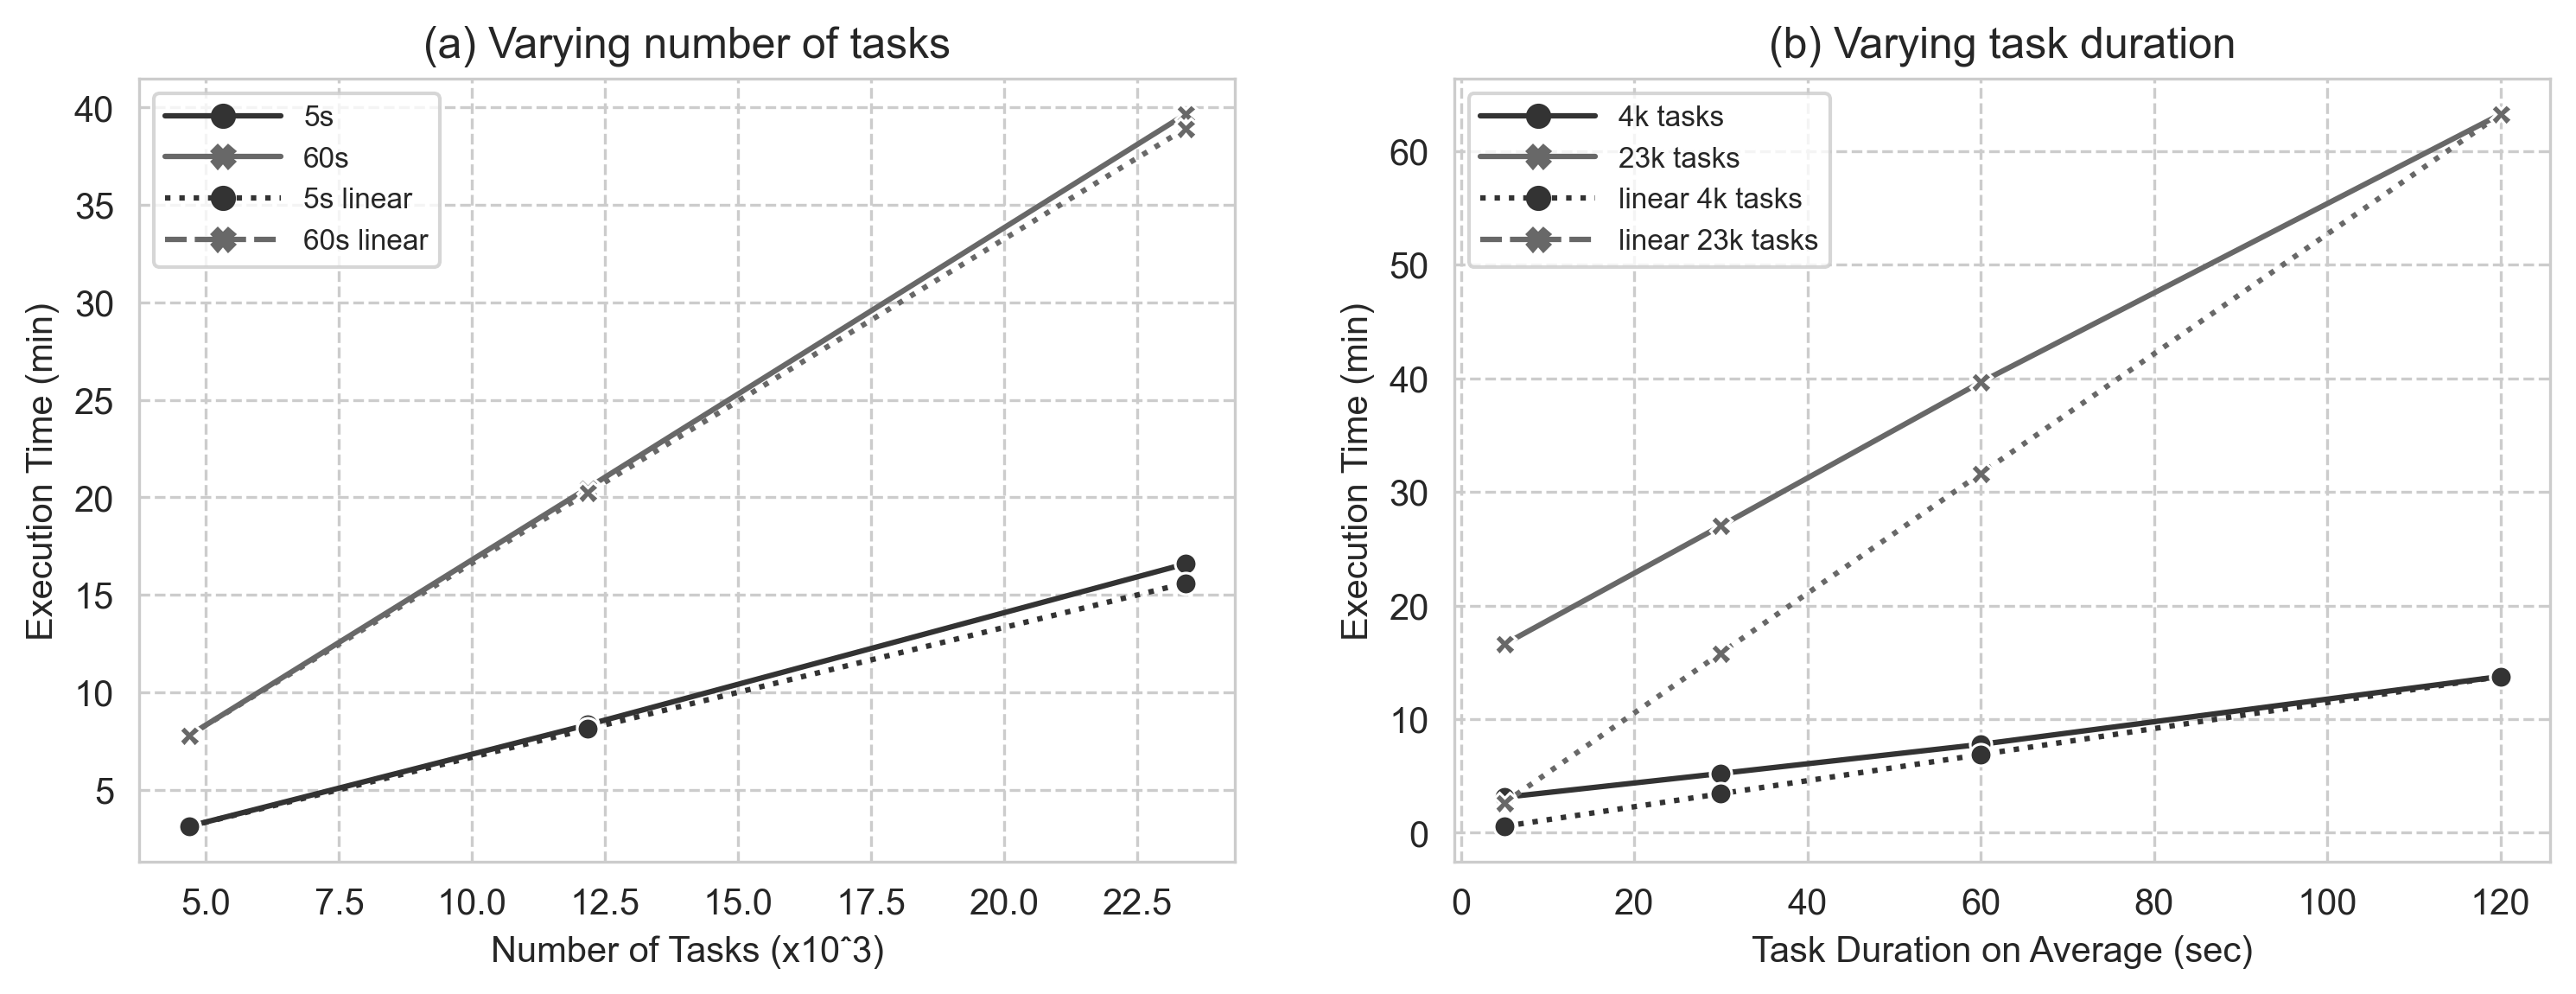

In [51]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=300)

# Exp3 - Varying number of tasks
index = 0
palette = sns.color_palette("Greys_r", 5)[:2]

axs[index].set_title("(a) Varying number of tasks")

sns.lineplot(data=exp3_df, x='tasks', y='time', hue='task_duration', 
             style="task_duration", markers=True, dashes=False, 
             palette=palette, ax=axs[index])

temp_ax = sns.lineplot(data=exp3_df, x='tasks', y='linear_time', hue='linear_task_duration', 
             style="linear_task_duration", dashes=True, markers=True, 
             palette=palette, ax=axs[index])

axs[index].lines[4].set_linestyle("dotted")
axs[index].lines[5].set_linestyle("dotted")
axs[index].lines[6].set_linestyle("dotted")

axs[index].set_xlabel("Number of Tasks (x10ˆ3)")
axs[index].set_ylabel("Execution Time (min)")
axs[index].legend(fontsize=8, handlelength=4)

# Exp2 - Weak scaling
index += 1
axs[index].set_title("(b) Varying task duration")

sns.lineplot(data=exp4_df, x='task_duration', y='time', hue='tasks', 
             style="tasks", markers=True, dashes=False, 
             palette=palette, ax=axs[index])

temp_ax = sns.lineplot(data=exp4_df, x='task_duration', y='linear_time', hue='linear_tasks', 
             style="linear_tasks", dashes=True, markers=True, 
             palette=palette, ax=axs[index])

axs[index].lines[4].set_linestyle("dotted")
axs[index].lines[5].set_linestyle("dotted")
axs[index].lines[6].set_linestyle("dotted")

axs[index].set_xlabel("Task Duration on Average (sec)")
axs[index].set_ylabel("Execution Time (min)")
axs[index].legend(fontsize=8, handlelength=4)
plt.savefig('exps3and4.pdf', format='pdf', dpi=1000, bbox_inches = 'tight')